# Import Libraries

In [205]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 30)
pd.set_option('display.precision', 2)
pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', '{:.2f}'.format)
np.set_printoptions(threshold=20, precision=2, suppress=True)

# Loading the dataset

In [206]:
df =  pd.read_csv('hotel_booking.csv')

# Exploratory Data Analysis and Data cleaning

In [207]:
df.shape

(119390, 36)

In [208]:
df.columns    # Check the columns and remove columns of no need 

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

#  Remove columns containing personal detail columns 

In [209]:
df.drop(['name', 'email','phone-number', 'credit_card'],axis=1,inplace = True)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Convertion of reservation_status_date column from string object to datetime object

In [211]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [212]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119386.00,119390.00,119390.00,119390.00,119390.00,119390.00,103050.00,6797.00,119390.00,119390.00,119390.00,119390.00,119390
mean,0.37,104.01,2016.16,27.17,15.80,0.93,2.50,1.86,0.10,0.01,0.03,0.09,0.14,0.22,86.69,189.27,2.32,101.83,0.06,0.57,2016-07-30 00:24:47.883407104
min,0.00,0.00,2015.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,6.00,0.00,-6.38,0.00,0.00,2014-10-17 00:00:00
25%,0.00,18.00,2016.00,16.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,62.00,0.00,69.29,0.00,0.00,2016-02-01 00:00:00
50%,0.00,69.00,2016.00,28.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,14.00,179.00,0.00,94.58,0.00,0.00,2016-08-07 00:00:00
75%,1.00,160.00,2017.00,38.00,23.00,2.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,229.00,270.00,0.00,126.00,0.00,1.00,2017-02-08 00:00:00
max,1.00,737.00,2017.00,53.00,31.00,19.00,50.00,55.00,10.00,10.00,1.00,26.00,72.00,21.00,535.00,543.00,391.00,5400.00,8.00,5.00,2017-09-14 00:00:00
std,0.48,106.86,0.71,13.61,8.78,1.00,1.91,0.58,0.40,0.10,0.18,0.84,1.50,0.65,110.77,131.66,17.59,50.54,0.25,0.79,NaN


Checking the categorical columns in the data

In [213]:
df.describe(include = object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


# Print col and each category in the column

In [214]:
for col in df.describe(include = object).columns:
    print(col)
    print(df[col].unique())
    print()
    print("-"*50)

hotel
['Resort Hotel' 'City Hotel']

--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']

--------------------------------------------------
country
['PRT' 'GBR' 'USA' ... 'ATF' 'SLE' 'LAO']

--------------------------------------------------
market_segment
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

--------------------------------------------------
distribution_channel
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

--------------------------------------------------
reserved_room_type
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

--------------------------------------------------
assigned_room_type
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']

--------------------------------------------------
deposit_type

Checking the null values in the data

In [215]:
df.isnull().sum() 

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
                              ..
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status             0
reservation_status_date        0
Length: 32, dtype: int64

Remove the company and agent column because there are lot of null values in these columns

In [216]:
df.drop(['company','agent'],axis=1,inplace = True) 

In [217]:
df.dropna(inplace = True)

Again checking the null values

In [218]:
df.isnull().sum() 

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Check the outliers in the dataset

<Axes: >

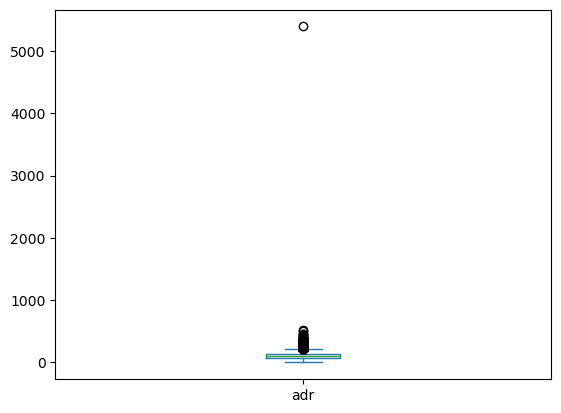

In [219]:
df['adr'].plot(kind='box')

In [220]:
# Remove the outlier  in the adr colum 
df=df[df['adr']<5000]

In [221]:
df.describe() # Now shows no much difference in adr values

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.00,118897.00,118897.00,118897.00,118897.00,118897.00,118897.00,118897.00,118897.00,118897.00,118897.00,118897.00,118897.00,118897.00,118897.00,118897.00,118897.00,118897.00,118897
mean,0.37,104.31,2016.16,27.17,15.80,0.93,2.50,1.86,0.10,0.01,0.03,0.09,0.13,0.22,2.33,101.96,0.06,0.57,2016-07-30 07:39:51.289939968
min,0.00,0.00,2015.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-6.38,0.00,0.00,2014-10-17 00:00:00
25%,0.00,18.00,2016.00,16.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,70.00,0.00,0.00,2016-02-02 00:00:00
50%,0.00,69.00,2016.00,28.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,95.00,0.00,0.00,2016-08-08 00:00:00
75%,1.00,161.00,2017.00,38.00,23.00,2.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,126.00,0.00,1.00,2017-02-09 00:00:00
max,1.00,737.00,2017.00,53.00,31.00,16.00,41.00,55.00,10.00,10.00,1.00,26.00,72.00,21.00,391.00,510.00,8.00,5.00,2017-09-14 00:00:00
std,0.48,106.90,0.71,13.59,8.78,1.00,1.90,0.58,0.40,0.10,0.18,0.85,1.48,0.65,17.63,48.09,0.24,0.79,NaN


# Data Analysis and Visualizations

Check the cancelled and not cancelled ratio

The percent of bookings cancelled and not cancelled is:  is_canceled
0   0.63
1   0.37
Name: proportion, dtype: float64

------------------------------------------------------------


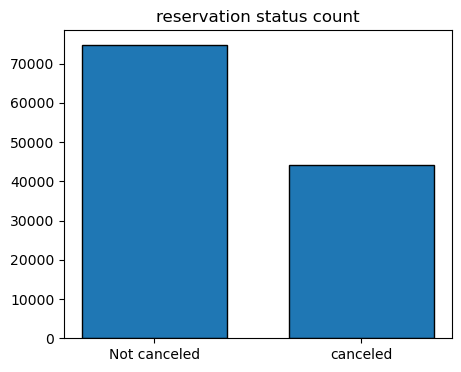

In [222]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(f"The percent of bookings cancelled and not cancelled is:  {cancelled_perc}")
print()
print('-'*60)

plt.figure(figsize = (5,4))
plt.bar(['Not canceled','canceled'],df['is_canceled'].value_counts(),edgecolor = 'black',width = 0.7)
plt.title('reservation status count')
plt.show()


Checking the number of reservations cancelled and not cancelled in the type of hotels

<function matplotlib.pyplot.show(close=None, block=None)>

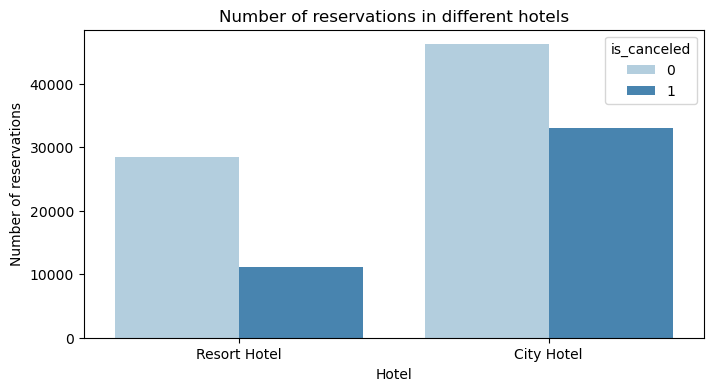

In [223]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'hotel',data = df, hue = 'is_canceled',palette = 'Blues')

plt.title('Number of reservations in different hotels')
plt.xlabel('Hotel')
plt.ylabel('Number of reservations')
plt.show


check cancellation in resort and city hotels

In [224]:
resort_hotel = df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0   0.72
1   0.28
Name: proportion, dtype: float64

Show percentage cancellation in city hotels

In [225]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0   0.58
1   0.42
Name: proportion, dtype: float64

# Now we are trying to see effect of average daily rate on the cancellation of bookings through visualization

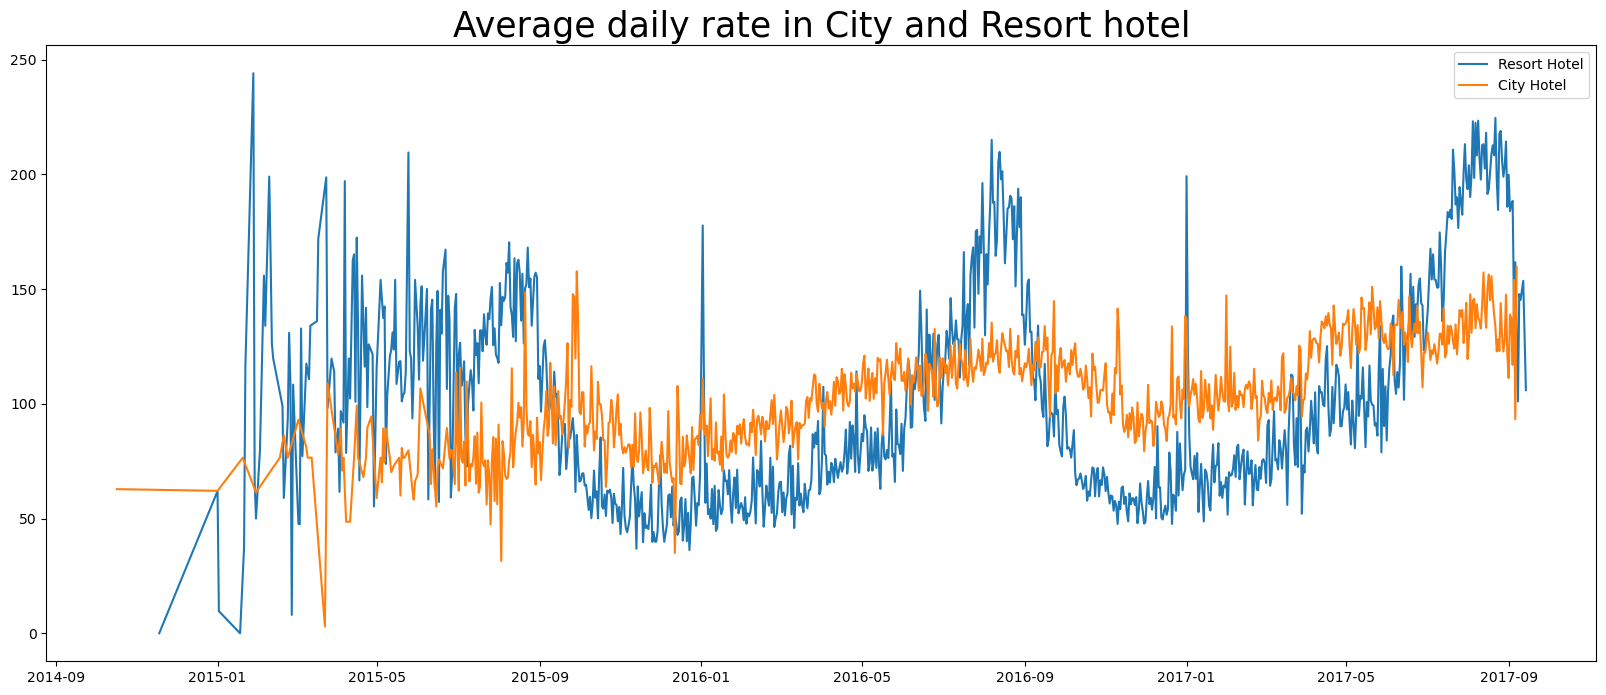

In [226]:
resort_hotel = df[df['hotel']=='Resort Hotel']
city_hotel = df[df['hotel']=='City Hotel']

resort_average_adr = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_average_adr = city_hotel.groupby('reservation_status_date')[['adr']].mean()

plt.figure(figsize = (20,8))
plt.title('Average daily reservation rate in City and Resort hotel', fontsize = 25)
plt.plot(resort_average_adr.index,resort_average_adr['adr'],label = 'Resort Hotel')
plt.plot(city_average_adr.index,city_average_adr['adr'],label = 'City Hotel')
plt.legend()
plt.show()

Now check in which month the cacellation is maximum

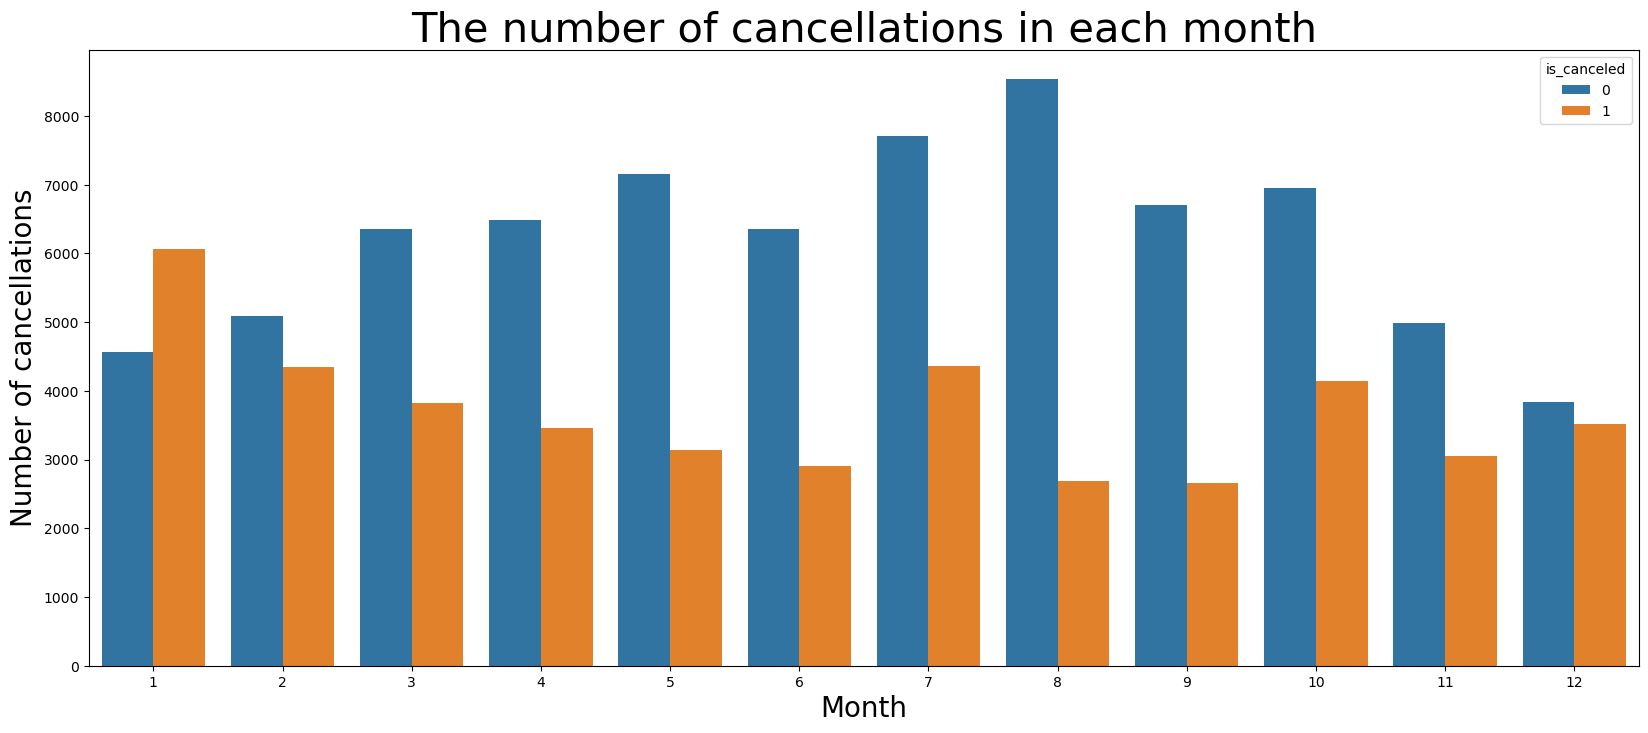

In [227]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (20,8))
sns.countplot(x = 'month',hue = 'is_canceled',data =df)

plt.title('The number of cancellations in each month',fontsize = 30)
plt.xlabel('Month',fontsize = 20)
plt.ylabel('Number of cancellations',fontsize= 20)
plt.show()

The plot shows that when there is high cancellation the booking rate is very low and when booking is high then cancellation is low 
Check that how it is related with price column

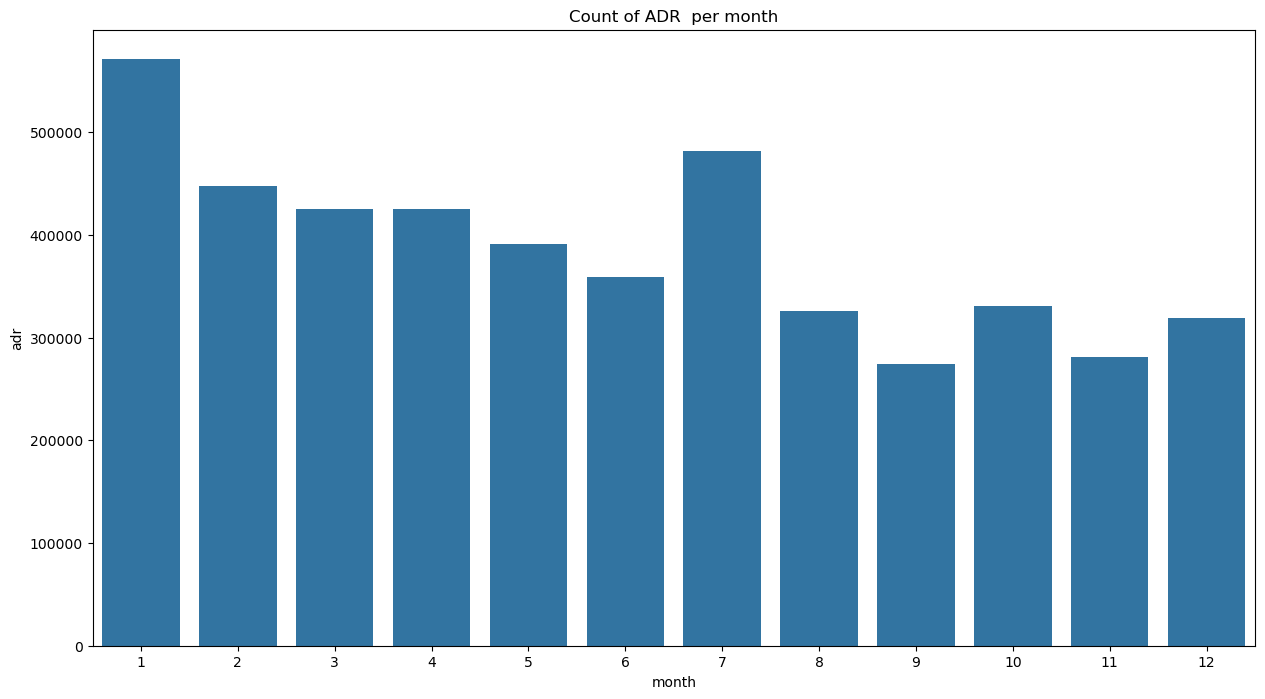

In [228]:
plt.figure(figsize = (15,8))
plt.title('Count of ADR  per month')
sns.barplot(x = 'month',y = 'adr',data = df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

The graph shows that average daily rate is high in January while we have seen that prices are high in the month of january so it is obvious cancellation rates rise with the increase of the prices

# Now we will check the percentage of cancellations of  top 10 countries using pie chart

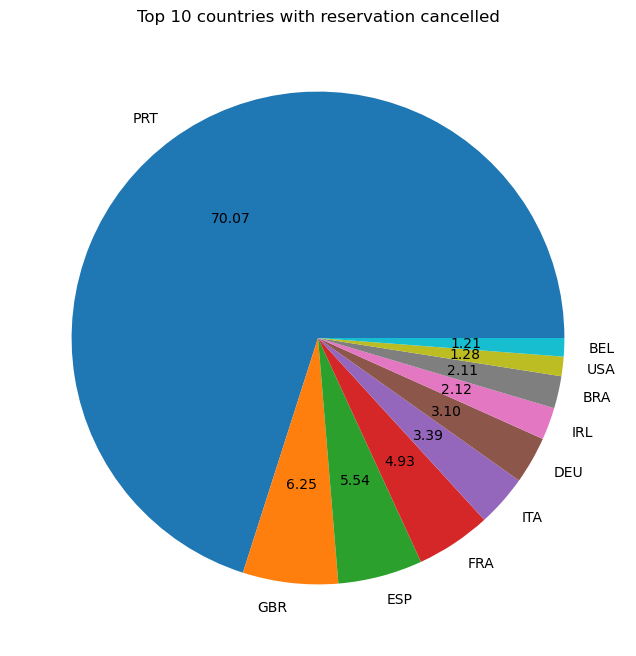

In [229]:
cancelled_data = df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation cancelled')
plt.pie(top_10_country,labels = top_10_country.index,autopct = "%0.2f")
plt.show()

The pie chart shows that cancellation rate is much more high in portugal country, which means we should 

In [230]:
df['market_segment'].value_counts(normalize = True)*100

market_segment
Online TA       47.44
Offline TA/TO   20.32
Groups          16.66
Direct          10.47
Corporate        4.30
Complementary    0.62
Aviation         0.20
Name: proportion, dtype: float64

Now checking the average daily rate of cancelled and non cancelled data

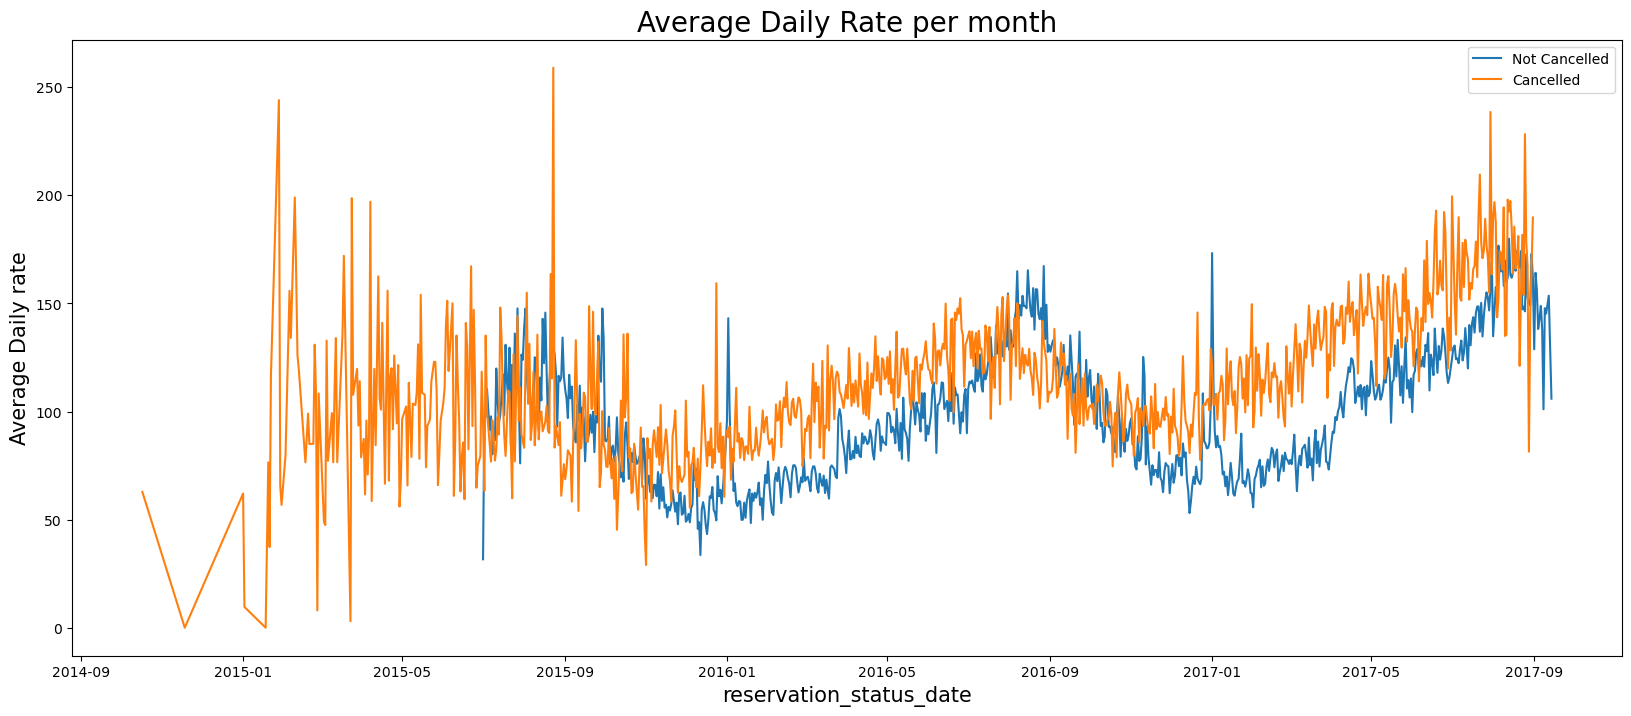

In [234]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean().reset_index()
cancelled_df_adr.sort_values('reservation_status_date',inplace = True)

not_cancelled_adr = df[df['is_canceled']==0]
not_cancelled_adr = not_cancelled_adr.groupby('reservation_status_date')[['adr']].mean().reset_index()
not_cancelled_adr.sort_values('reservation_status_date',inplace = True)

plt.figure(figsize = (20,8))
plt.title('Average Daily Rate per month',fontsize = 20)
plt.plot(not_cancelled_adr['reservation_status_date'],not_cancelled_adr['adr'], label = 'Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'Cancelled')
plt.xlabel('reservation_status_date',fontsize = 15)
plt.ylabel('Average Daily rate',fontsize = 15)
plt.legend()
plt.show()
